In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import keras 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller, acf, pacf
# Modeling tools
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split

# visualization tools

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from pandas_profiling import ProfileReport
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:

# Load Preprocessing Script
import os, sys
sys.path.append(os.path.abspath(os.path.join('E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data_preparation')))
"""
Import required Data processing scripts
"""

from Data_Loader import Data_Loader 
from Preprocess_Working_Data import Data_Preprocessing
from Make_Plots import Make_Plots

In [3]:
# Instantiate Preprocessing cript
DL=Data_Loader()
dp=Data_Preprocessing()
mp=Make_Plots()

In [13]:
# Load Cleaned Data
data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\Train_Data_AfterEDA.csv")
test_data=DL.read_csv("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Data\\rossmann-store-sales\\Test_Data_AfterEDA.csv ")

In [5]:
# Visualize the Data
data.head(5)

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
0,2013-01-01,1,1,0,0,0,0,a,1,1270.0,...,2012.0,2013,1,1,1,1,0,1,0,2
1,2013-01-02,1,2,5530,668,1,0,0,1,1270.0,...,2012.0,2013,1,2,2,1,0,1,0,2
2,2013-01-03,1,3,4327,578,1,0,0,1,1270.0,...,2012.0,2013,1,3,3,1,0,1,0,2
3,2013-01-04,1,4,4486,619,1,0,0,1,1270.0,...,2012.0,2013,1,4,4,1,0,1,0,2
4,2013-01-05,1,5,4997,635,1,0,0,1,1270.0,...,2012.0,2013,1,5,5,1,1,1,0,2


In [6]:
print(len(data))

1017209


In [7]:
# Check if there are Duplicate and Missing values
data.isnull().sum()

Date                         0
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
Year                         0
Month                        0
Day                          0
weekday                      0
weekofyear                   0
weekend                      0
PromoInterval                0
Assortment                   0
StoreType                    0
dtype: int64

In [8]:
data.duplicated().sum()

0

# There is no missing and Duplicate value, select the attributes for timeseries analysis

In [9]:
data=data.set_index(['Date'])

In [10]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0,0,0,0,a,1,1270.0,9.0,...,2012.0,2013,1,1,1,1,0,1,0,2
2013-01-02,1,2,5530,668,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,2,2,1,0,1,0,2
2013-01-03,1,3,4327,578,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,3,3,1,0,1,0,2
2013-01-04,1,4,4486,619,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,4,4,1,0,1,0,2
2013-01-05,1,5,4997,635,1,0,0,1,1270.0,9.0,...,2012.0,2013,1,5,5,1,1,1,0,2


In [11]:
data.sort_values(by='Date', ascending = True, inplace=True)
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceYear,Year,Month,Day,weekday,weekofyear,weekend,PromoInterval,Assortment,StoreType
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1,0,0,0,0,a,1,1270.0,9.0,...,2012.0,2013,1,1,1,1,0,1,0,2
2013-01-01,304,1,0,0,0,0,a,1,1950.0,7.0,...,2012.0,2013,1,1,1,1,0,1,0,0
2013-01-01,986,1,0,0,0,0,a,1,620.0,10.0,...,2014.0,2013,1,1,1,1,0,0,0,0
2013-01-01,724,1,0,0,0,0,a,1,5900.0,8.0,...,2012.0,2013,1,1,1,1,0,1,2,3
2013-01-01,805,1,0,0,0,0,a,1,24770.0,10.0,...,2014.0,2013,1,1,1,1,0,2,0,3


In [14]:
data2=data[['Date', 'Sales']]
data2.head()

,Date,Sales
0,2013-01-01,0
1,2013-01-02,5530
2,2013-01-03,4327
3,2013-01-04,4486
4,2013-01-05,4997


In [15]:
# Convert Date to Datetime
data2.Date = pd.to_datetime(data2.Date)

C:\Users\HB\AppData\Local\Temp\ipykernel_19040\1027918010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.Date = pd.to_datetime(data2.Date)


In [16]:
# Remove Dates that have no sales
data2 = data2[data2['Sales'] > 0.0]

In [17]:
data2.head()

,Date,Sales
1,2013-01-02,5530
2,2013-01-03,4327
3,2013-01-04,4486
4,2013-01-05,4997
6,2013-01-07,7176


# Visualize the Relationship between Date and Sales

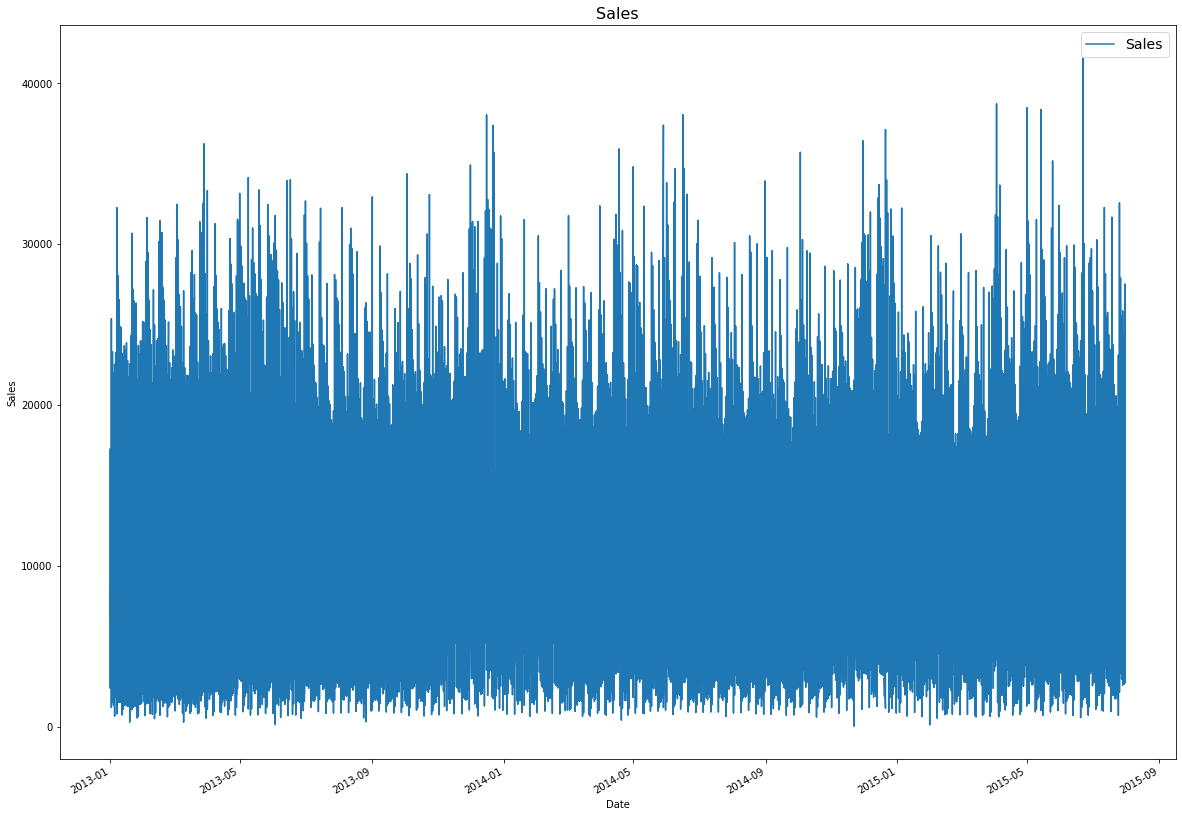

In [18]:

import matplotlib.pyplot as plt
data2.plot(x='Date', figsize=(20, 15))
plt.ylabel("Sales")
plt.title("Sales", fontsize=16)
plt.legend(fontsize=14);
plt.show()

In [19]:
# Split the data
train_size = int(len(data2) * 0.70)
test_size = len(data2) - train_size
train, test = data2.iloc[0:train_size], data2.iloc[train_size:len(data2)]

In [20]:
print(f"There is {train_size} Training Data ")
print(f"There is {test_size} Testing Data ")

There is 591036 Training Data 
There is 253302 Testing Data 


In [21]:
train.shape, test.shape

((591036, 2), (253302, 2))

# split Test data into test and Validation set

In [22]:
test_size=int(len(test)*0.5)
validation_size=len(test)-test_size

In [23]:
print(f" Test size is :{test_size} and Validation size is :{validation_size}")

 Test size is :126651 and Validation size is :126651


In [24]:
test_data, validation_data = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(test_data.shape, validation_data.shape)

(126651, 2) (126651, 2)


In [25]:
# standardize the data
from sklearn.preprocessing import StandardScaler


In [26]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Sales']])

train['Sales'] = scaler.transform(train[['Sales']])
test_data['Sales'] = scaler.transform(test_data[['Sales']])
validation_data['Sales'] = scaler.transform(validation_data[['Sales']])

C:\Users\HB\AppData\Local\Temp\ipykernel_19040\2299719624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Sales'] = scaler.transform(train[['Sales']])
C:\Users\HB\AppData\Local\Temp\ipykernel_19040\2299719624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sales'] = scaler.transform(test_data[['Sales']])
C:\Users\HB\AppData\Local\Temp\ipykernel_19040\2299719624.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [27]:
#create Padding sequence
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)


In [28]:
X_train, y_train = create_sequences(train[['Sales']], train['Sales'])
X_test, y_test = create_sequences(test_data[['Sales']], test_data['Sales'])
X_val, y_val = create_sequences(validation_data[['Sales']], validation_data['Sales'])

In [29]:
X_train.shape, y_train.shape

((591006, 30, 1), (591006,))

In [30]:
X_test.shape, y_test.shape

((126621, 30, 1), (126621,))

In [31]:
X_val.shape, y_val.shape

((126621, 30, 1), (126621,))

# Build Sequential Model

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, TimeDistributed, RepeatVector

In [33]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))

model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.compile(optimizer=Adam(learning_rate=0.0001, epsilon=1e-08, decay=0.01), loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

# Fit The Data to the Model

In [34]:
history = model.fit(X_train[:10000], y_train[:10000], epochs=20, batch_size=30, validation_data=(X_val[:2000], y_val[:2000]),
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/20
334/334 [==============================] - 44s 88ms/step - loss: 0.4799 - val_loss: 0.4575
Epoch 2/20
334/334 [==============================] - 26s 77ms/step - loss: 0.4539 - val_loss: 0.4551
Epoch 3/20
334/334 [==============================] - 27s 80ms/step - loss: 0.4514 - val_loss: 0.4541
Epoch 4/20
334/334 [==============================] - 25s 74ms/step - loss: 0.4502 - val_loss: 0.4535
Epoch 5/20
334/334 [==============================] - 25s 76ms/step - loss: 0.4497 - val_loss: 0.4532
Epoch 6/20
334/334 [==============================] - 24s 73ms/step - loss: 0.4491 - val_loss: 0.4529
Epoch 7/20
334/334 [==============================] - 25s 75ms/step - loss: 0.4488 - val_loss: 0.4527
Epoch 8/20
334/334 [==============================] - 17s 52ms/step - loss: 0.4487 - val_loss: 0.4525
Epoch 9/20
334/334 [==============================] - 19s 55ms/step - loss: 0.4485 - val_loss: 0.4524
Epoch 10/20
334/334 [==============================] - 20s 61ms/step - loss: 0.448

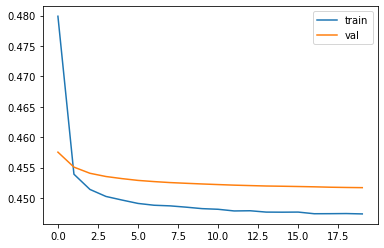

In [35]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

# Model Evaluation

In [ ]:
X_test_pred = model.predict(X_test[:2000])
print(f" Test Accuracy {X_test_pred[1]}")
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis=1)

In [50]:
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model
import datetime
save_model(model, "E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Models\\LSTM_model-"+datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")+".h5")

In [51]:

model = load_model("E:\\10xAccademy_Practice\\Week 3\\Week 3 Challenge\\Sales Data Prediction\\Models\\LSTM_model-2022-09-11-11-17-32.h5")

In [52]:
score=model.predict(X_test[:2000])

63/63 [==============================] - 2s 17ms/step


In [53]:
print(score[1])

[[-0.25797382]
 [-0.4321113 ]
 [-0.54637396]
 [-0.61712134]
 [-0.65735525]
 [-0.67697835]
 [-0.683292  ]
 [-0.6815217 ]
 [-0.67529196]
 [-0.6670261 ]
 [-0.6582704 ]
 [-0.64994824]
 [-0.6425536 ]
 [-0.6362961 ]
 [-0.63120574]
 [-0.62720704]
 [-0.6241695 ]
 [-0.62194157]
 [-0.6203708 ]
 [-0.61931676]
 [-0.61865604]
 [-0.6182855 ]
 [-0.6181215 ]
 [-0.61809796]
 [-0.6181647 ]
 [-0.6182845 ]
 [-0.6184307 ]
 [-0.6185847 ]
 [-0.61873466]
 [-0.6188732 ]]
